# データサイエンス応用 #2

今回から、早速、テキストマイニングを実践したいと思います。
自然言語処理の活用事例には、「検索エンジン」「機械翻訳」「文章要約」「対話型AI、チャットボット」「音声認識、AIスピーカー」等、ここには書ききれないほどあります。
今回からしばらくは、簡単な分析の例として、青空文庫（ https://www.aozora.gr.jp/ ）の小説を対象として、作品や著者によって異なる文章の特徴を調べていきたいと思います。

# 「文字」「文」「単語」の処理

テキストを処理するとき、多くの場合、「文字」「文」「単語」の単位で処理をすることになります。

例えば、

---

    私は西村です。
    こんにちは。元気ですか？

---

というテキストを処理することを考えましょう。

文字単位の処理では、「`私`」「`は`」「`西`」「`村`」「`で`」「`す`」「`。`」のように、一文字ごとに処理をすることになります。
他言語やアルファベットでも同様です。

文単位だと少し話はややこしくなります。
「文」の定義を決めないといけません。
日本語の場合、「文」は、「`。`(句点)」から「`。`(句点)」までのまとまった内容を表すひと続きになると思います。

一方で、改行で区切ることを文の定義とした場合、 上記の例は、「`私は西村です。`」と「`こんにちは。元気ですか？`」の二つの文となります。
日本語の場合、これは本来の「文」の定義ではありませんが、コンピュータを使った処理では、簡単な「文」のようなものとして扱われることもあります。

ただし、日本語の場合は、`。`（句点）を文の区切りとするのが基本です。
` 。`で区切った場合、上記の例は、「`私は西村です。`」「`こんにちは。`」「`元気ですか？`」と３つの文となります。
`。`だけではなく、`？`や`！`で区切る必要がある場合もあります。

また、

---

    私は、「こんにちは。」と言った。

---
では、`。`で単純に区切ることはできず、この場合は、一つの文として扱うことが通常となります。
このように「文」というものを扱うだけでもなかなか難しい話になります。

さらにややこしいのが「単語」を単位とする場合です。
英語の場合、基本的には、単語は空白で区切られています。
このため、厳密でなければ、空白を目印とすることで、簡単な手順で単語単位の処理が可能です。
一方、日本語では、単語は空白で区切られておらず、単語を区切るという作業は、そもそも人間であっても難しく、人によって結果に違いがでてきます。
例えば、「`和歌山大学`」は、「`和歌山`」と「`大学`」に区切ることができますし、「`和歌山大学`」という一つの固有名詞として扱うこともできます。

この授業では、「言語」の深い部分まで議論することはできません。
単語を区切る（わかち書き）に関する研究の成果として「形態素解析」というものがあります。
「形態素」とは、言語学の用語で「意味をもつ表現要素の最小単位」のことで、日本語の場合は、ほとんど「単語」と同じだと考えることができます。 「形態素解析」は、自然言語処理研究の分野において、もっとも基本であり、かつ、常に発展している研究テーマとなっています。
本授業では、その成果を利用させていただき、既存の形態素解析プログラムが出力した結果を利用した単語単位の処理を行います。

前置きが長くなりましたが、「文字」を単位とする処理からはじめてみましょう。

# 文字単位の処理

## 文字の出現回数

それでは、次のコードを実行してみてください。
このプログラムは、文字列（`s`）に含まれる文字の登場回数を求めるものです。
対象の文字列は、英字でも、日本語でも動作します。

文字数を数えるには、Python標準の`collection`モジュールの`Counter`クラスを使うことができます。
戻り値は、辞書型で`{文字: 出現回数}`のようになります。

---
    from collections import Counter

    s = "This is a pen."
    c = Counter(s)
    print(s)
    print(c)
    print()

    s = "吾輩は猫である。名前はまだ無い。"
    c = Counter(s)
    print(s)
    print(c)
    
 ---
 
キーとして要素を指定するとその個数を取得することができます。要素として存在しない値を指定すると0を返します。
例えば、以下のようになります。

---

    print(c['猫'])

---

In [1]:
from collections import Counter

s = "This is a pen."
c = Counter(s)
print(s)
print(c)
print()

s = "吾輩は猫である。名前はまだ無い。"
c = Counter(s)
print(s)
print(c)

This is a pen.
Counter({' ': 3, 'i': 2, 's': 2, 'T': 1, 'h': 1, 'a': 1, 'p': 1, 'e': 1, 'n': 1, '.': 1})

吾輩は猫である。名前はまだ無い。
Counter({'は': 2, '。': 2, '吾': 1, '輩': 1, '猫': 1, 'で': 1, 'あ': 1, 'る': 1, '名': 1, '前': 1, 'ま': 1, 'だ': 1, '無': 1, 'い': 1})


`Counter`は`most_common()`で出現回数順に並べたリストを取得することができます。
次のプログラムのように、`c.most_common(20)`とすると上位20個を取得することができます。

出現回数が最も多いものは`[0]`、最も少ないものは`[-1]`で取得できます。

出現回数の少ない順に並べ替えたい場合は、増分を-1として、`print(c.most_common()[::-1])`とすることができます。

なお、このプログラムでは、入力ファイルとして`plain.txt`を使用しています。
これには、前回の課題解説で作成した「吾輩は猫である」のプレーンテキストを使用してください（ファイル名は`plain.txt`にしています）。

コードの中では、`values, counts = zip(*c.most_common(top))`で、`values（文字）`と`counts（回数）`に分解しています。
そして、その値をもとに`matplotlib`の`plt.bar()`で棒グラフをプロットしています。

`matplotlib`の`xlabel`や`ylabel`で漢字ひらがなを使う際には、フォントの設定が必要です。
ここでは、Windows環境を想定したフォントの設定をしています。

 ---
    %matplotlib inline
    from collections import Counter
    import matplotlib.pyplot as plt

    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "./plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    top = 20  # 出力する上位数
    c = Counter(s)
    print(c.most_common(top)) # most_comon()で上位を抽出

    values, counts = zip(*c.most_common(top))
    plt.bar(values, counts)
    plt.xlabel("上位" + str(top) )
    plt.ylabel("出現回数")
    plt.show()

[('の', 12477), ('い', 10299), ('る', 8726), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7487), ('か', 7303), ('し', 6947), ('は', 6880), ('、', 6774), ('で', 6228), ('た', 6131), ('を', 6119), ('が', 6000), ('っ', 5629), ('ら', 5552), ('う', 5326), ('も', 5220)]


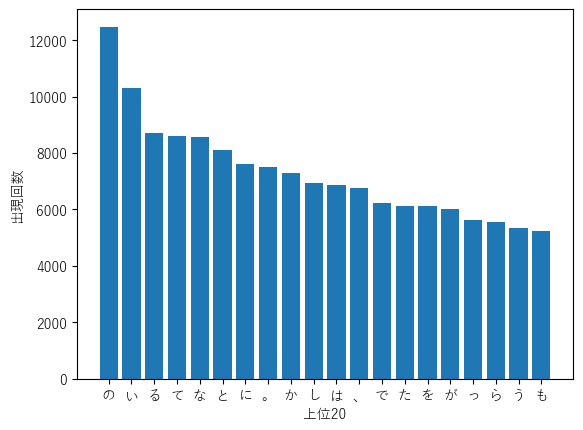

In [8]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

# matplotlibのフォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

path = "../data/wagahaiwa_nekodearu.output.txt"

with open(path, encoding="utf-8") as f:
        s = f.read()

top = 20  # 出力する上位数
c = Counter(s)
print(c.most_common(top)) # most_comon()で上位を抽出

values, counts = zip(*c.most_common(top))
plt.bar(values, counts)
plt.xlabel("上位" + str(top) )
plt.ylabel("出現回数")
plt.show()

#  文単位の処理
## 改行で区切る場合

次に文単位で処理する例を見てみましょう。

次のコードは`readlines()`で読み込んだ各行を文としてみなし、 各行（各文） に含まれる文字数`len(x)`を取得するプログラムです。
`[len(x) for x in lines]`は、Pythonのリスト内包表記で`lines`の各行`x`に長さ`len(x)`のリストを取得することができます。

---

    from collections import Counter

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            lines = f.readlines()

    cnt = Counter([len(x) for x in lines])
    print(cnt.most_common(100))

In [15]:
from collections import Counter

path = "../data/wagahaiwa_nekodearu_output_nocount.txt"

with open(path, encoding="utf-8") as f:
        lines = f.readlines()

cnt = Counter([len(x) for x in lines])
print(cnt.most_common(100))

[(1, 84), (13, 49), (12, 46), (22, 44), (17, 41), (24, 41), (21, 41), (18, 41), (20, 41), (14, 41), (15, 40), (19, 40), (25, 39), (23, 38), (16, 35), (28, 35), (26, 34), (29, 32), (11, 32), (40, 30), (6, 30), (9, 30), (27, 29), (32, 26), (43, 25), (39, 25), (52, 24), (5, 23), (37, 23), (34, 22), (8, 21), (38, 21), (31, 20), (35, 20), (53, 20), (10, 20), (45, 19), (42, 19), (44, 18), (30, 18), (46, 18), (7, 18), (33, 16), (36, 16), (41, 16), (47, 15), (71, 15), (48, 15), (61, 14), (49, 13), (50, 13), (72, 13), (55, 13), (51, 13), (57, 13), (54, 12), (78, 12), (59, 12), (70, 12), (66, 12), (98, 11), (67, 11), (2, 10), (64, 10), (69, 10), (60, 10), (65, 9), (68, 9), (92, 9), (102, 9), (85, 8), (129, 8), (111, 8), (88, 8), (63, 8), (62, 8), (96, 7), (58, 7), (87, 7), (75, 7), (74, 7), (99, 7), (91, 6), (76, 6), (80, 6), (81, 6), (165, 6), (56, 6), (90, 6), (73, 5), (79, 5), (95, 5), (113, 5), (105, 5), (112, 5), (130, 5), (93, 5), (77, 5), (152, 4), (144, 4)]


ところで、このプログラムを実行すると、トップが`(1, 86)`であり、1文字で構成された文（行）がもっとも多いことがわかります。
これはなぜでしょうか？
次のプログラムをつかって1文字だけの行を表示してみましょう。

なお、このプログラムでは、`print(repr(x))`の`repr()`によって、各行`x`を`print()`する際にraw文字列に変換してから出力しています。

---
    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            lines = f.readlines()

    for x in lines:
            if len(x) == 1:
                    # raw文字列に変換してからprint()
                    print(repr(x))

In [16]:
path = "../data/wagahaiwa_nekodearu_output_nocount.txt"

with open(path, encoding="utf-8") as f:
    lines = f.readlines()

for x in lines:
    if len(x) == 1:
            # raw文字列に変換してからprint()
            print(repr(x))

'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'
'\n'


予想できた人も多いと思いますが、1文字だけの行は、

    '\n'

であり、改行のみの行、つまり空行であることがわかります。

空行のみの行を削除する方法は、いくつもの方法がありますが、今回は、次の方法をご紹介したいと思います。

---
    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    # 文字列を改行ごとに分割し、リスト化
    lines = s.splitlines()

    # 空行を削除
    while '' in lines:
            lines.remove('')
    
    # 結果をraw文字にして出力
    for l in lines:
            print(repr(l))

このコードでは、文章（ファイル）全体を

    s = f.read()

で一つの文字列`s`に代入しています。 その後、

    lines = s.splitlines()

によって、全体`s`を各行で分割して、リスト`lines`にしています。
文字列に対するメソッド`splitlines()`では、文字列を改行ごとに分割し、リスト化することができます。
このとき、各行の末尾には改行文字は含まれません。

実際に空行のみの行を削除しているのは、

     while '' in lines:
            lines.remove('')

の部分です。
`remove()`は、リストに対するメソッドで、指定した値と同じ要素を検索し、最初の要素を削除するものです。
つまり、
    lines.remove('')
によって、`lines`の中から、空行（''）の最初のものを削除します。
ただし、2番目以降は残りますから、`while`で`lines`の中に空行（''）が存在する限り、繰り返しをしています。

空行のみを削除する方法は、ほかにもさまざまな方法が考えられますので、考えてみましょう。

次のプログラムは、空行を削除した上で、文字数200未満の行のみ文字数`len()`を取得、各行を構成する文字数のヒストグラムを出力するものです。プログラムを順に読んでみてください。

---

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np

    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    # 文字列を改行ごとに分割し、リスト化
    lines = s.splitlines()

    # 空行を削除
    while '' in lines:
            lines.remove('')

    # 文字数200未満の行のみ文字数len()を取得
    cnt = np.array([len(x) for x in lines if len(x) < 200])

    # ヒストグラムの生成
    # bins, 表示する棒の数（ビン数）defulat:10
    plt.hist(cnt, bins=cnt.max())
    plt.xlabel("文字数（文単位）")
    plt.ylabel("出現頻度")
    plt.show()

## 句点（。）で区切る場合

さて、ここまでは改行（`\n`）を一つの文の区切りとみなしていましたが、`plain.txt`の中にも、

    どこで生れたかとんと見当がつかぬ。何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。吾輩はここで始めて人間というものを見た。しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。この書生というのは時々我々を捕えて煮て食うという話である。しかしその当時は何という考もなかったから別段恐しいとも思わなかった。ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。この時妙なものだと思った感じが今でも残っている。第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。のみならず顔の真中があまりに突起している。そうしてその穴の中から時々ぷうぷうと煙を吹く。どうも咽せぽくて実に弱った。これが人間の飲む煙草というものである事はようやくこの頃知った。

が一行になっている部分があったりと、それではあまり意味がないことがわかります。
ここからは、文を句点（`。`）で区切られたものとして処理する方法を考えてみましょう。

次のコードを見てください。
`splitlines()`ではなく、正規表現を使った`re.split()`によって、全体の文字列`s`を分割しています。

正規表現のパターンは、`。|\n`としています。
これによって`s`は、句点（`。`）もしくは、改行（`\n`）によって分割されます。

---
    import re

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    # 文字列を分割し、リスト化
    lines = re.split("。|\n", s)
    #lines = re.split("。(?!」)|\n", s)

    # 空行を削除
    while '' in lines:
            lines.remove('')

    for l in lines:
            print(repr(l))

ただし、このままだと、例えば、

---

    「元気です。」と、私は言った。

---

が、

---

    「元気です
    」と、私は言った

---

のように分割されてしまいます。
これを防ぐには、`」`の直前の句点（`。`）では、区切らないほうが良いようです。

正規表現のパターンを

    。(?!」)|\n

に変更してみましょう。

Pythonの正規表現モジュール`re`では、`(?!...)`は、`...`が次に続くものにマッチしなければマッチするというルールになっています。
つまり、`(?!」)`は、`」`が後ろに続かなければマッチするという意味になります。
その結果、`。(?!」)`は、`。`のあとに`」`がなければマッチします。

先ほどのプログラムの正規表現パターンを変更して（コメントで無効になっている部分を有効にして）、再度実行してみると、上記の例は、修正されます。
ただし、どうやら、`plain.txt`の元になった`wagahaiwa_nekodearu.txt`では、登場人物の発言を示す`「」`の中の文章末には、`。`は使われておらず、この変更は、残念ながらあまり意味をなしません。

また、

---

    「もうよそう。勝手にするがいい。がりがりはこれぎりご免蒙るよ」と、前足も、後足も、頭も尾も自然の力に任せて抵抗しない事にした。

---
は、

---

    「もうよそう
     勝手にするがいい
     がりがりはこれぎりご免蒙るよ」と、前足も、後足も、頭も尾も自然の力に任せて抵抗しない事にした

---

のように区切られてしまう問題が残っています。
文章を区切るというのはなかなか奥の深い、沼のような処理が必要になることがわかっていただけるでしょう。

次のプログラムは、句点（`。`）で区切った各文のうち、200文字未満を抽出し、その文字数のヒストグラムを出力するプログラムです。出力結果を確認してください。

---

    %matplotlib inline
    import re
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import Counter

    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    # 文字列を分割し、リスト化
    lines = re.split("。(?!」)|\n", s)

    # 空行を削除
    while '' in lines:
            lines.remove('')

    # 文字数200未満の行のみ文字数len()を取得
    cnt = np.array([len(x) for x in lines if len(x) < 200])

    # ヒストグラムの生成
    # bins, 表示する棒の数（ビン数）defulat:10
    plt.hist(cnt, bins=cnt.max())
    plt.xlabel("文字数（文単位）")
    plt.ylabel("出現頻度")
    plt.show()

# 単語単位の処理
## Janomeのインストール

ここからは形態素解析を使った単語単位の処理の話をします。

日本語のテキストで単語単位の処理を行うためには、形態素解析によってテキストを単語に分割する必要があります。
形態素解析には、高度な処理が必要であり、多くの研究がこれまでなされていますが、現在では、オープンソースで公開されているプログラムを利用することができます。
有名なものにMeCab（ https://taku910.github.io/mecab/ ）があります。 
MecabをPythonで利用することも可能で、実際にMecabが利用されることが多いです。
しかし、もともとMeCabはPython用のソフトウェアではなく、また、Windowsにインストールするのが少しだけ面倒です（といっても、次回以降にインストールする予定です）。

今回は、インストールが簡単で、Pythonで実装された、Python用の形態素解析器であるJanome（ https://mocobeta.github.io/janome/ ）を利用したいと思います。
Janomeは、MeCabの辞書データを利用しており、MeCabと同等の解析結果を出力することが可能です。
また、依存ライブラリなしで簡単にインストールでき、Pythonのアプリケーションに組み込みやすいシンプルなAPIが提供されています。
ただし、MeCabに比べると処理速度が遅いことが欠点であり、大量のテキストデータを処理したいときなどは、MeCabの導入した方がよいでしょう。

形態素解析のプログラムには、JanomeやMeCab以外にも多くのものがあります。
また、Web API経由で利用することができるようにしたウェブサービスなども提供されています。
皆さんの目的にあったものを選ぶようにしてください。

それでは、Janomeをインストールしてみましょう。
Janomeは、Anacondaには含まれていないので追加のインストールが必要です。
といっても、Pythonのライブラリとして公開されているため、他のモジュールと同様に簡単にインストールすることができます。
Pythonで追加ライブラリをインストールには、Pythonの外部コマンドである`pip`コマンドを利用します。
Jupyter Notebookで外部コマンドを実行するときには、以下のように、`!`を付けて実行してください。

---

    !pip install janome

---
`Successfully installed janome-0.4.2`といった感じに表示されたらインストールは完了です。

もしかしたら、インストールしたモジュールを反映させるために、Jupyter Notebook（のkernel）をrestartさせる必要があるかもしれません。その際は、`pip`でインストールした後、Jupyter Notebookの上部メニューの「`Kernel`」→「`Restart`」を試してください。

PythonプログラムからJanomeをつかってみましょう。
次のコードを実行してください。

---

    from janome.tokenizer import Tokenizer

    t = Tokenizer()

    input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"
    #input_txt = "すもももももももものうち"

    for token in t.tokenize(input_txt):
        print(token)

Janomeの出力では、単語単位に区切られた結果が出力されます。

区切られた（わかち書きされた）単語そのものである表層形（surface）の他に、
- 品詞（`part_of_speech`）
- 活用型（`infl_type`）
- 活用形（`infl_form`）
- 基本形・見出し語（`base_form`）
- 読み（`reading`）
- 発音（`phonetic`）
の情報が含まれます。

該当する情報が存在しないときは、`*`が表示されます。
また、品詞（`part_of_speech`）には、「`品詞,品詞細分類1,品詞細分類2,品詞細分類3`」といったように、詳細な品詞情報が付与されています（細分類がないときは`*`になります）。

「主人公」の読み（reading）は「シュジンコウ」なのに対して、発音（phonetic）が「シュジンコー」になっていることにも注目してください。

また、「すもももももももものうち」も正しく解析できます。

使い方を説明します。

入力文字列`input_txt`に対して、形態素解析の結果が取得できています。

    t = Tokenizer()
    
で`Tokenizer`オブジェクトを作り（初期化）、`tokenize()`メソッドに解析したい文字列を渡しています。

戻り値は`Token`オブジェクトのイテレータです。
イテレータ（複数の要素を持っており、順番にデータを取り出すことができるもの）なので、`for`ループなどで要素を取り出す必要があります。
つまり、

    for token in t.tokenize(input_txt):
        print(token)

の`token`として取得することができます。

今後、解析を連続して実行することがありますが、`t = Tokenizer()`の初期化は、遅い処理になるので、何度も実行しないようにしてください。
例えば、`for`や`while`でループをまわすときは、ループの外に記述する必要があります（基本的にはプログラムの最初の方で一回記述すればOKです）。

次に、表層形（つまり、単語）のみを出力する「わかち書きモード」を試してみます。

`tokenize()`メソッドに`wakati = True`オプションを追加します。

---

    from janome.tokenizer import Tokenizer

    t = Tokenizer()

    input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"

    # わかち書きモード（表層形のみを返すモード）
    for token in t.tokenize(input_txt, wakati=True):
        print(token)

次のコードでは`token`から、表層形（`surface`）、品詞（`part_of_speech`）、活用型（`infl_type`）、活用形（`infl_form`）、基本形・見出し語（`base_form`）、読み（`reading`）、発音（`phonetic`）の情報をそれぞれ取得しています。

---

    from janome.tokenizer import Tokenizer

    t = Tokenizer()

    input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"

    for token in t.tokenize(input_txt):
        print("--")
        print("表層系: " + token.surface)
        print("品詞: " + token.part_of_speech)
        print("活用型: " + token.infl_type)
        print("活用形: " + token.infl_form)
        print("基本形: " + token.base_form)
        print("読み: " + token.reading)
        print("発音: " + token.phonetic)

ファイルから読み込んだ文字列を形態素解析する実装の例を示します。

---

    from janome.tokenizer import Tokenizer

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    t = Tokenizer()
    for token in t.tokenize(s):
            print(token)

## 単語の出現頻度

Janomeをつかって形態素解析をして、単語ごとの出現回数の棒グラフをプロットするプログラムです。わかち書きモードの結果を利用しています。
例では、上位100単語を出力していますが`top`の値を調整してください。

助詞や句読点等の記号が多いようです。
それらは除外した方が、文章の特徴がわかりやすくなるかもしれません。

---
    %matplotlib inline
    import numpy as np
    from collections import Counter
    from janome.tokenizer import Tokenizer
    import matplotlib.pyplot as plt
    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    t = Tokenizer()

    c = Counter(t.tokenize(s, wakati=True))

    top = 100  # 出力する上位数
    print(c.most_common(top))

    values, counts = zip(*c.most_common(top))
    plt.bar(values, counts)
    plt.xlabel("上位" + str(top) )
    plt.ylabel("出現回数")
    plt.show()

最後に、文ごとに構成する単語数のヒストグラムをプロットしてみましょう。
これもこれまで解説してきたことに、形態素解析の結果を入力したものになります。

なお、このプログラムでは、

    [word_count(x) for x in lines]
    
の部分で、文（`x`）ごとに形態素解析をする必要があるため、新しい関数`word_count()`を先に定義します。
`word_count()`の戻り値は、形態素解析後の単語の数`len(w)`です。

---
    # 関数の定義
    def word_count(l):
            w = [token for token in t.tokenize(l, wakati=True)]
            #print(w)

            return len(w)

`word_count()`関数が定義できたら、次のプログラム本体を実行してください。
なお、 文の分割には、

    lines = re.split("。(?!」)|\n", s)

を利用しています。

---

    %matplotlib inline
    import re
    import matplotlib.pyplot as plt
    import numpy as np
    from janome.tokenizer import Tokenizer
    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
        s = f.read()

    # 文字列を分割し、リスト化（文単位）
    lines = re.split("。(?!」)|\n", s)

    # 空行を削除
    while '' in lines:
        lines.remove('')

    # Tokenizer()のインスタンス生成はループの外で実行
    # とても遅いため
    t = Tokenizer()

    cnt = np.array([word_count(x) for x in lines])

    # ヒストグラムの生成
    # bins, 表示する棒の数（ビン数）defulat:10
    plt.hist(cnt, bins=cnt.max())
    plt.xlabel("単語数（文単位）")
    plt.ylabel("出現頻度")
    plt.show()

今回の授業は以上となります。
Janomeには、まだまだ他にも機能があります。
形態素解析の前処理・後処理するためのフレームワーク`Analyzer`は便利です。
文字の正規化などの前処理、小文字化、品詞によるトークンのフィルタリングなどの形態素解析後の後処理は、実社会に存在しているテキストを処理する上で必要となります。

また、Janomeは、MeCabの標準辞書（IPADIC）を内包しています。
ただし、IPADICには、最近の新しい単語などは登録されておらず、ウェブのテキスト等を解析すると高い精度を得ることができません。
このため、ユーザ定義辞書を使ったり、新しい辞書を使う必要があります。
Janomeでは、ユーザ定義辞書を使ってIPADICに単語を追加することができます。

新しい単語も含んだ「NEologd（ねおろぐでぃー）辞書（mecab-ipadic-NEologd）」（ https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md ）という辞書を利用することもできます。
この辞書は、ウェブ上の多数の言語資源から得た新語を追加することでカスタマイズしたMeCab用辞書です。
頻繁に更新されており、新語・固有表現に強く、語彙数が多く、オープンソースであるという特徴があります。

Janomeのウェブサイト（ https://mocobeta.github.io/janome/ ）には、NEologd辞書をJanomeで利用する方法の説明があります。
興味がある人は、試してみるとよいでしょう （メモリ使用量が多くなり、処理が重くなりますので、この授業ではとりあえず使わないようにします）。

# 本日の課題

## 課題1

句点（`。`）に基づいて、文に分割するプログラムを完成させなさい。
ただし、「」の中の。は区切らず、一つの繋がった文として出力するようにすること。

この課題は、Pythonの有用なライブラリを活用することを目的とします。
これまで述べたように、Pythonにはさまざまな有用なライブラリがあり、それを`pip`でインストールすることで利用できます。
使えそうなライブラリを探して、`pip`でインストールして使用してください。 使用することができるライブラリは、`!pip install`で自動的にダウンロードしてインストールできるものに限ります。

ヒント：
`plain.txt`（`wagahaiwa_nekodearu.txt`）を入力としたとき、完成したプログラムで保存した出力のサンプル（`wagahaiwa_nekodearu.sentence.txt`）をMoodleコースに添付します。
これと同様の出力ができればOKです。

ファイルのほぼ終盤で、

    「もうよそう。勝手にするがいい。がりがりはこれぎりご免蒙るよ」と、前足も、後足も、頭も尾も自然の力に任せて抵抗しない事にした。

が一つの文として出力できていることがわかると思います。

適切なライブラリをみつけることができれば、難しいプログラムではありません。
ライブラリを使わないと、とても大変なプログラムとなりますが、修行として実装に挑戦してもらってもOKです（とりあえず私はやろうとは思っていません）。

まず、以下のセルをつかって `!pip install hogehogehoge`で探したライブラリをインストールしてください。`hogehogehoge`の部分はライブラリの名前が入ります。

次のセルには、コードを入力して、文を分割した結果を`wagahaiwa_nekodearu.sentence.txt`に保存するようにしてください。なお、セルには、ヒントを記載しているので、不足部分を補うことでコードを完成させることができます（ヒントを使わずゼロから記述しても構わない）。

In [ ]:

### この部分にコードを追加する

path = "plain.txt"

with open(path, encoding="utf-8") as f:
        s = f.read()

### この部分にコードを追加する

### 分割後の各行をprint()
for l in lines:
        print(l)

### 分割後の各行を\nで結合してからファイルに書き出し
output_file = "wagahaiwa_nekodearu.sentence.txt"
with open(output_file, mode='w', encoding="utf_8") as f:
    f.write('\n'.join(lines))
print("done.")

## 課題2

`plain.txt`（`wagahaiwa_nekodearu.txt`）を形態素解析した結果から、名詞のみを抽出し、その上位20単語の出現回数を棒グラフでプロットするプログラムを実装しなさい。 ただし、「名詞,非自立」は除外すること。

ヒント：
出力したグラフの例をMoodleに掲載します。
そのグラフと同様なものが出力できればOKです。
なお、セルには、ヒントを記載しているので、不足部分を補うことでコードを完成させることができます（ヒントを使わずゼロから記述しても構わない）。

In [ ]:
%matplotlib inline
import numpy as np
from collections import Counter
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt
# matplotlibのフォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

path = "plain.txt"

with open(path, encoding="utf-8") as f:
        s = f.read()

t = Tokenizer()

### この部分にコードを追加する



top = 20  # 出力する上位数
print(c.most_common(top))

values, counts = zip(*c.most_common(top))
plt.bar(values, counts)
plt.xlabel("上位" + str(top) )
plt.ylabel("出現回数")
plt.show()

### 提出方法
上記のコードを参考にして、セルに課題の回答となる外部コマンドとコードを入力して実行してください。
実行できたら、Notebook形式ファイル（.ipynb）を保存（File -> Download as）して、保存した.ipynbのファイルをMoodleコースから提出してください（次回課題の解説をしますから、あきらめずに提出してください）。